In [113]:
from utility import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.ticker as mticker
from tmdb_api import *

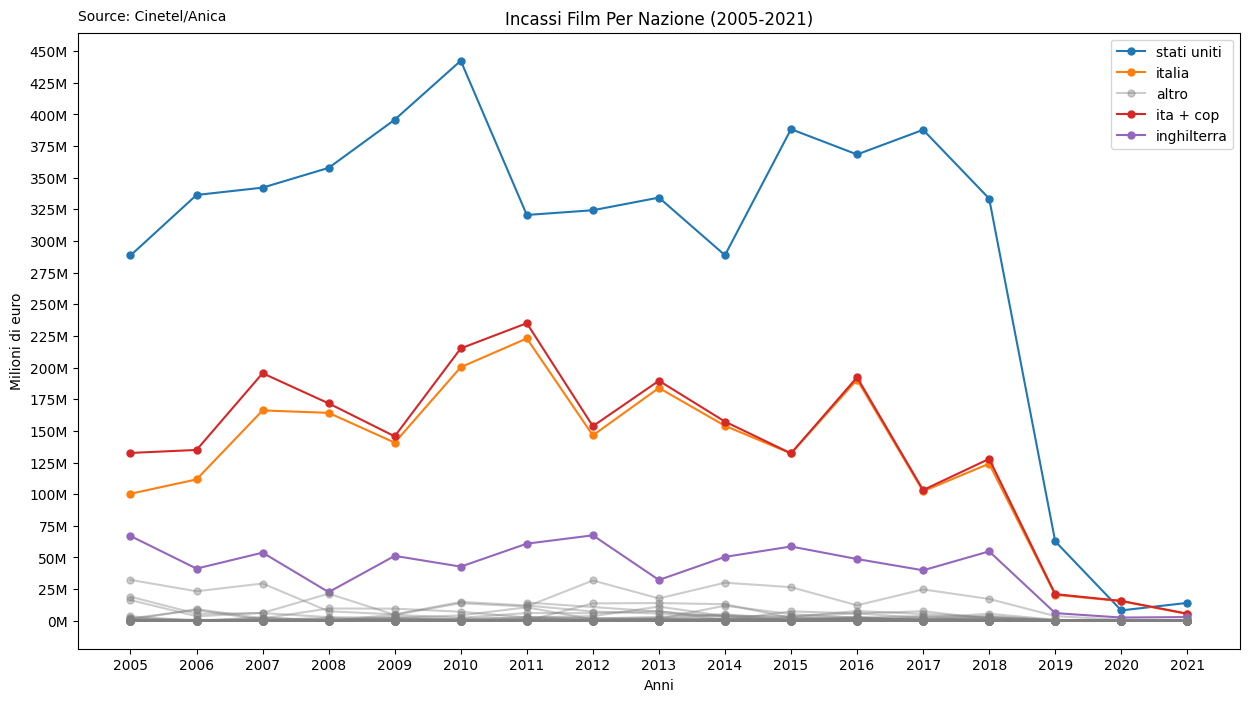

In [114]:
# INCASSI FILM IN ITALIA PER NAZIONE (2005-2021)

# plt.style.use('ggplot')
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15,8))
handles = []

nazioni = naz['Nazione'].unique()

count = 1;
for nazione in nazioni:
    tmp = naz[naz['Nazione'] == str(nazione)][['Year', 'Incasso']]    
    if tmp['Incasso'].max() > 50000000:
        line, = ax.plot(tmp['Year'], tmp['Incasso'], label=nazione.lower(), marker='o', markersize=5)
        handles.append(line)
    else:
        line, = ax.plot(tmp['Year'], tmp['Incasso'], label='altro', alpha=.4, marker='o', markersize=5)
        if count == 1: # mi serve per non aggiungere duplicati nella legenda
            handles.append(line)
            count = 0
        line.set_color('grey')

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Incassi Film Per Nazione (2005-2021)')

ax.legend(handles = handles)

# custom x_ticks for Million
plt.yticks(np.arange(0, naz['Incasso'].max()+25000000, step=25000000))
plt.xticks(np.arange(2005, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Incassi_Nazioni.png', bbox_inches='tight')

plt.show()

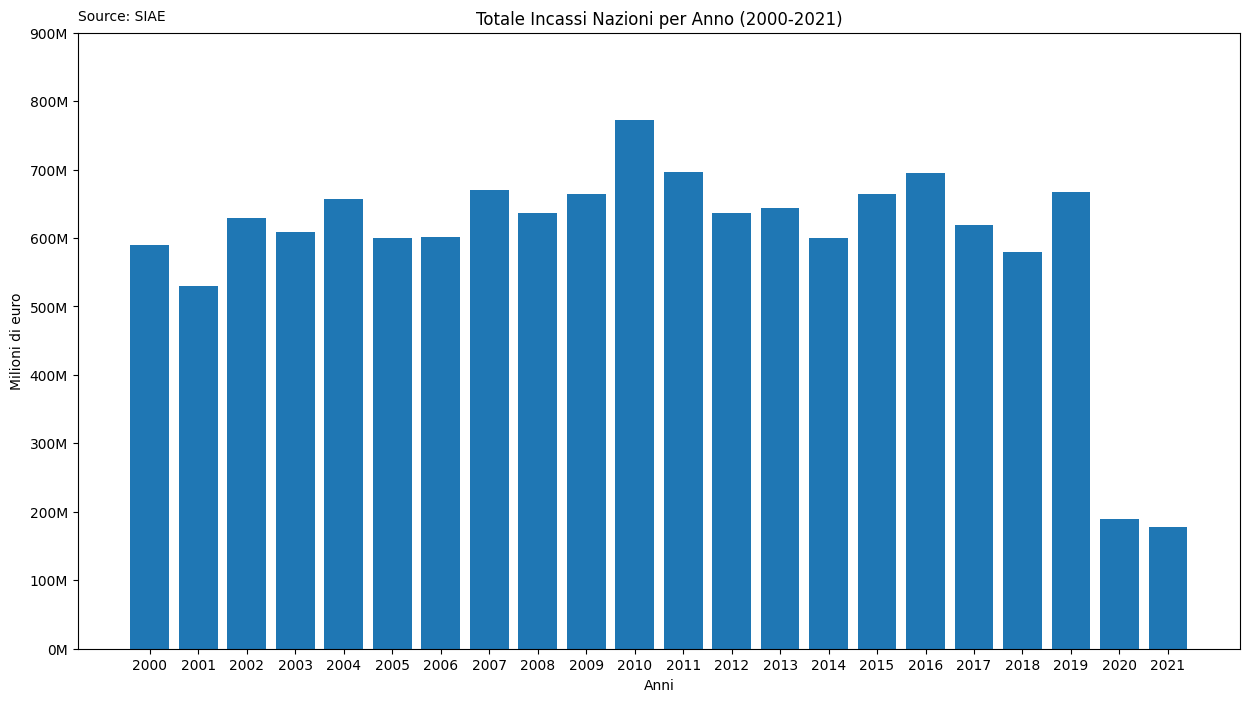

In [115]:
# TOTALE INCASSI (SIAE)
df = info_cinema[['Year', 'Spesa al botteghino']]

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(df['Year'], df['Spesa al botteghino'])

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Totale Incassi Nazioni per Anno (2000-2021)')

plt.yticks(np.arange(0, 1000000000, step=100000000))
plt.xticks(np.arange(2000, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: SIAE', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/totale_incassi.png', bbox_inches='tight')

plt.show()

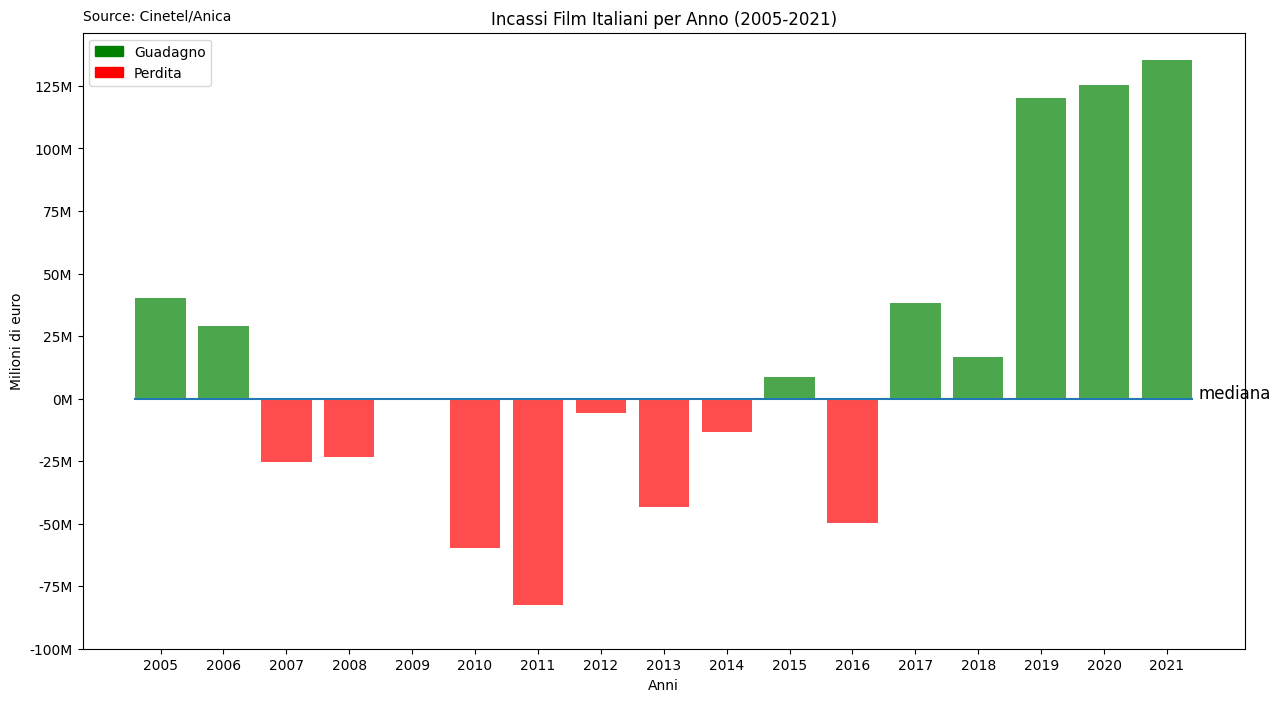

In [116]:
# E ORA UN FOCUS SUL CAMBIAMENTO DEGLI INCASSI DI FILM ITALIANI 2005-2021

def get_changes(df, median):
    incassi = []
    colors = []
    for index, row in df.iterrows():
        change = median-row['Incasso']
        incassi.append(change)
        if change >= 0:
            colors.append('green')
        else:
            colors.append('red')
    return incassi, colors

italia = naz[naz['Nazione'] == 'ITALIA']
incassi, colors = get_changes(italia, italia['Incasso'].median())

c = {'Guadagno':'green', 'Perdita':'red'}      
labels = list(c.keys())
handles = [plt.Rectangle((0,0),1,1, color=c[label]) for label in labels]

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(italia['Year'], incassi, color=colors, label=c, alpha=.7)

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Incassi Film Italiani per Anno (2005-2021)')
ax.legend(handles, labels)

x = [ax.patches[0].get_x(), ax.patches[-1].get_x() + ax.patches[-1].get_width()]
y = [0 for i in x]
ax.plot(x, y)
ax.text(2021.5, 0, 'mediana', fontsize=12)

plt.yticks(np.arange(-100000000, 150000000, step=25000000))
plt.xticks(np.arange(2005, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Incassi_Italia.png', bbox_inches='tight')

plt.show()

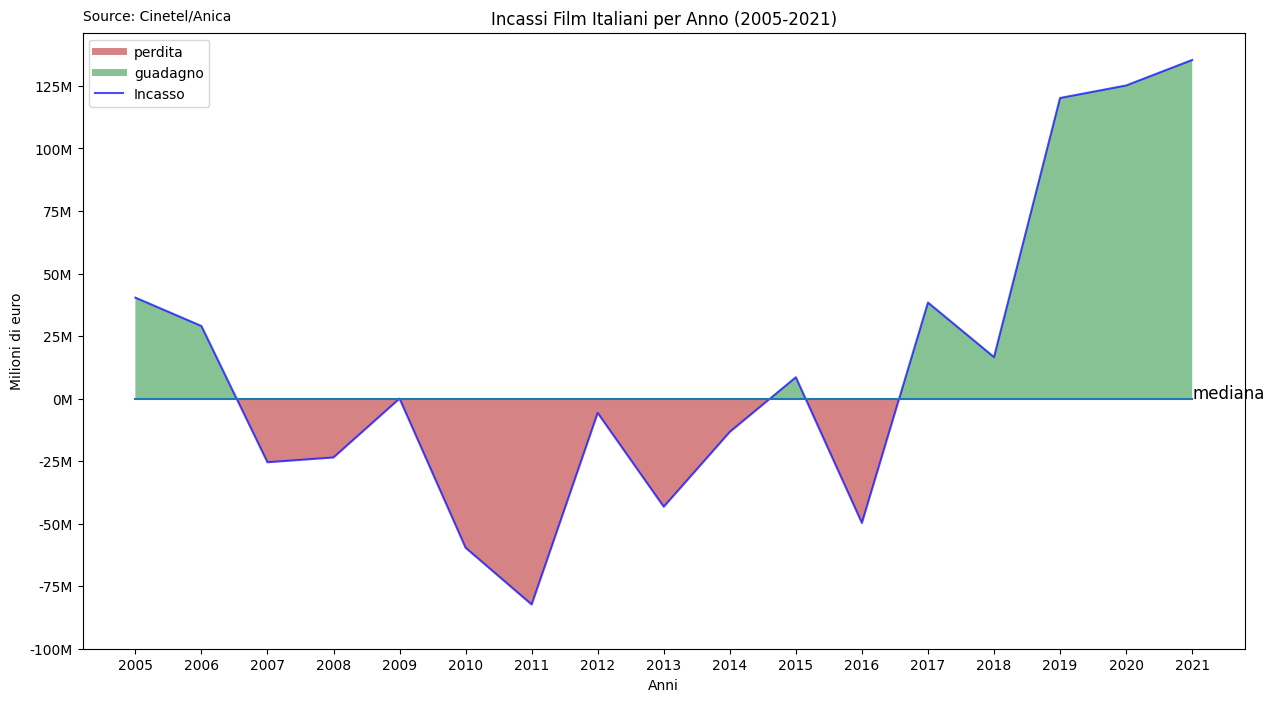

In [117]:
# FOCUS SEMPRE SULL'ITALIA MA CON LINE PLOT E FILL BETWEEN 2005-2021

italia = naz[naz['Nazione'] == 'ITALIA']
median = 0
incassi = pd.Series(incassi)

# necessiario per riempire i "gap" nel fill_between
anni = np.linspace(italia['Year'].iloc[0], italia['Year'].iloc[-1], len(italia['Year']) * 100)
incassi_interp = np.interp(anni, italia['Year'], incassi)

# c = {'Guadagno':'green', 'Perdita':'red'}      
# labels = list(c.keys())
# handles = [plt.Rectangle((0,0),1,1, color=c[label]) for label in labels]

fig, ax = plt.subplots(figsize=(15,8))

# usati per la legenda
ax.plot([],[],linewidth=5, label='perdita', color='r',alpha=0.7)
ax.plot([],[],linewidth=5, label='guadagno', color='g',alpha=0.7)

ax.plot(italia['Year'], incassi, color='blue', label='Incasso', alpha=.7)
ax.fill_between(anni, incassi_interp, median, where=(incassi_interp >= median), facecolor='g', alpha=.7)
ax.fill_between(anni, incassi_interp, median, where=(incassi_interp < median), facecolor='r', alpha=.7)

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Incassi Film Italiani per Anno (2005-2021)')
ax.legend()

x = italia['Year']
y = [0 for i in x]
ax.plot(x, y, label='mediana')
ax.text(2021, 0, 'mediana', fontsize=12)

plt.yticks(np.arange(-100000000, 150000000, step=25000000))
plt.xticks(np.arange(2005, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Incassi_Italia_fill_between.png', bbox_inches='tight')

plt.show()

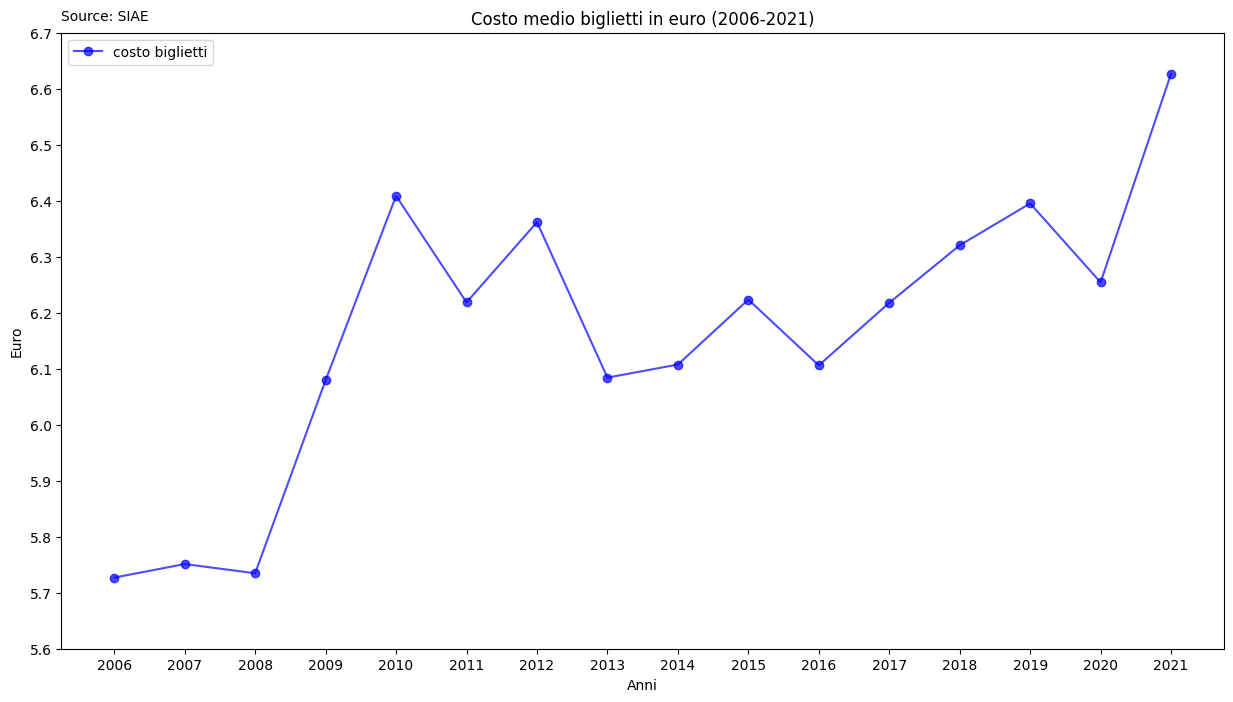

In [118]:
# COSTO MEDIO BIGLIETTI 2006-2021 (SIAE)

cb = costo_biglietti.loc[:, '2021':]
tmp = np.arange(2006, 2022)
years = [str(x) for x in tmp]
cb = cb[years]

fig, ax = plt.subplots(figsize=(15,8))

x = cb.columns
y = cb.iloc[0]
ax.plot(x, y, color='blue', label='costo biglietti', alpha=.7, marker='o')

plt.xlabel('Anni')
plt.ylabel('Euro')
plt.title('Costo medio biglietti in euro (2006-2021)')
ax.legend(loc='upper left')

plt.yticks(np.arange(5.6, 6.7, step=.1))

# credit source data
plt.annotate('Source: SIAE', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Costo_biglietti.png', bbox_inches='tight')

plt.show()

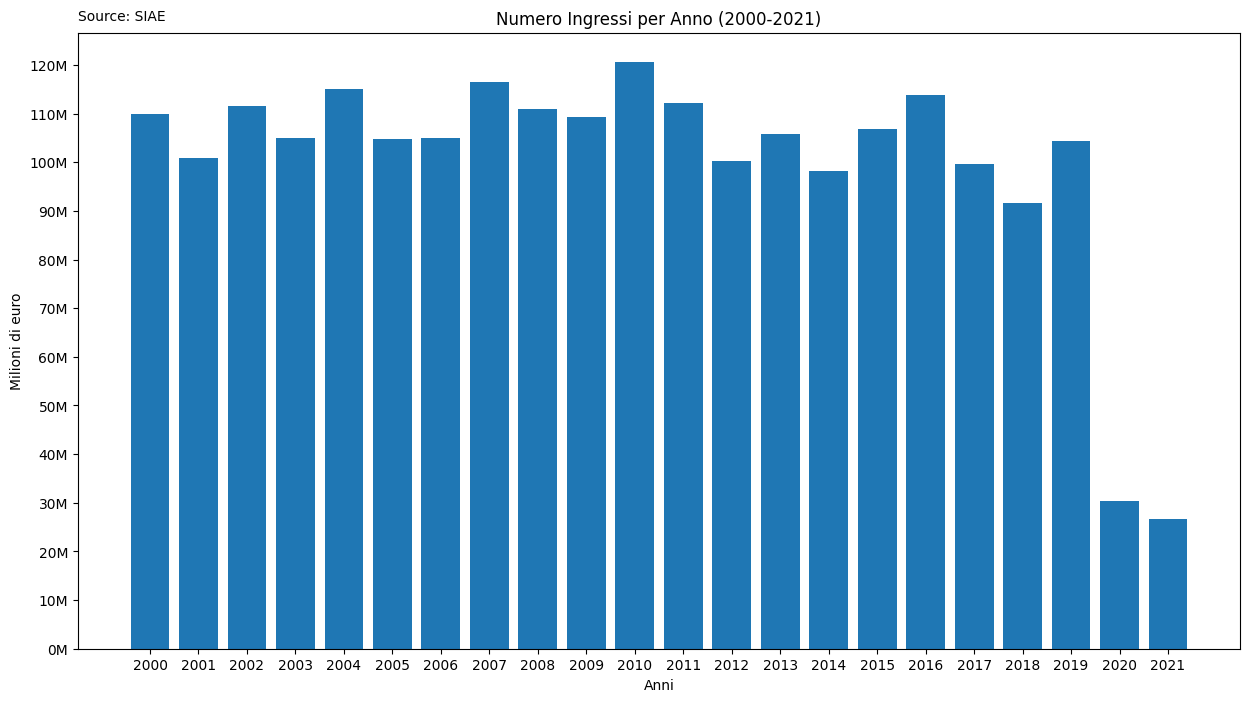

In [119]:
# TOTALE INGRESSI (SIAE)
df = info_cinema[['Year', 'Ingressi']]

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(df['Year'], df['Ingressi'])

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Numero Ingressi per Anno (2000-2021)')

plt.yticks(np.arange(0, 130000000, step=10000000))
plt.xticks(np.arange(2000, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: SIAE', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/totale_ingressi.png', bbox_inches='tight')

plt.show()

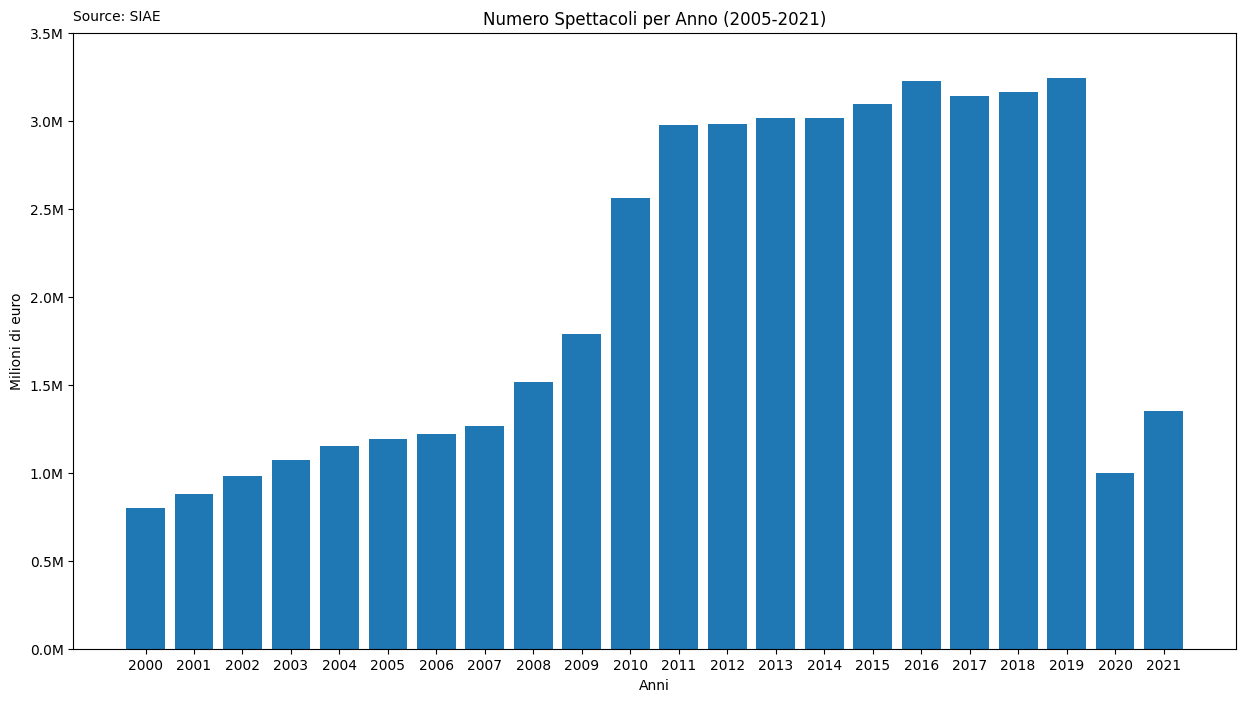

In [120]:
# TOTALE SPETTACOLI (SIAE)
df = info_cinema[['Year', 'Numero spettacoli']]

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(df['Year'], df['Numero spettacoli'])

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Numero Spettacoli per Anno (2005-2021)')

plt.yticks(np.arange(0, 4000000, step=500000))
plt.xticks(np.arange(2000, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.01f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: SIAE', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/totale_spettacoli.png', bbox_inches='tight')

plt.show()

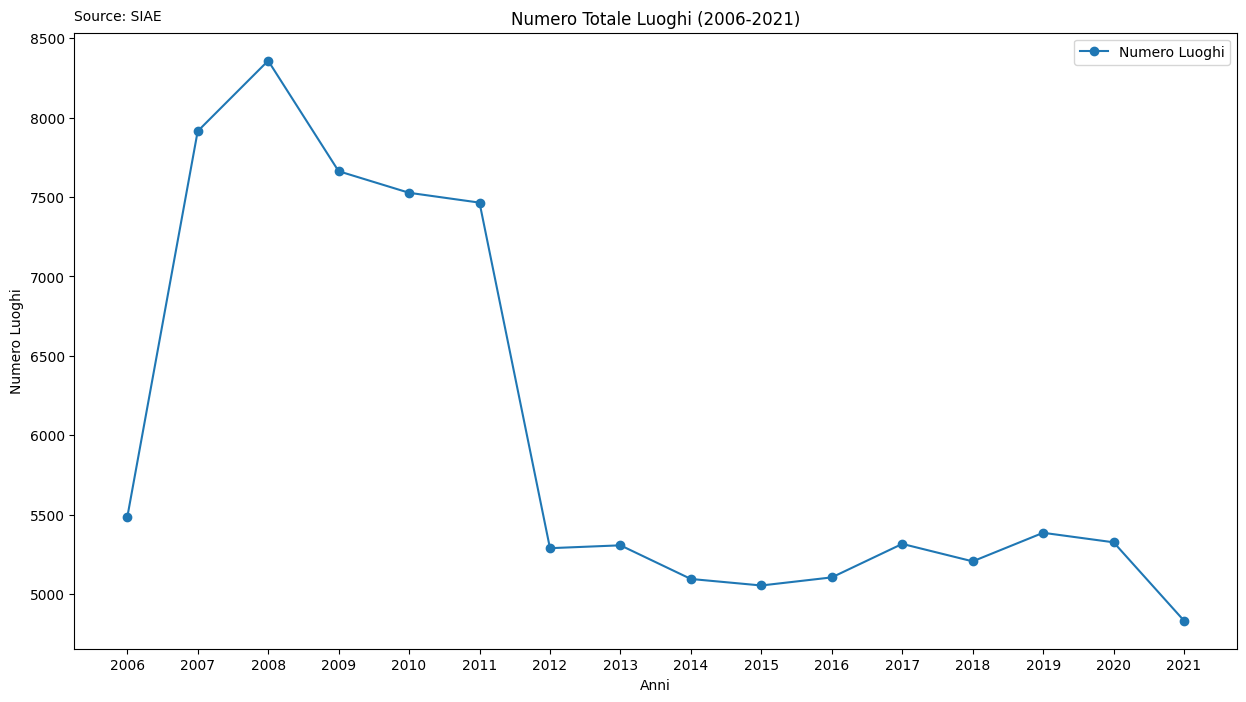

In [121]:
# NUMERO LUOGHI CINEMA IN ITALIA 2005-2021

fig, ax = plt.subplots(figsize=(15, 8))

x = num_luoghi['Anno']
y = num_luoghi['Totale']

ax.plot(x, y, label='Numero Luoghi', marker='o')

plt.title('Numero Totale Luoghi (2006-2021)')
plt.xlabel('Anni')
plt.ylabel('Numero Luoghi')
ax.legend()

plt.xticks(np.arange(2006, 2022, step=1))

# credit source data
plt.annotate('Source: SIAE', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/num_luoghi_totale.png', bbox_inches='tight')

plt.show()

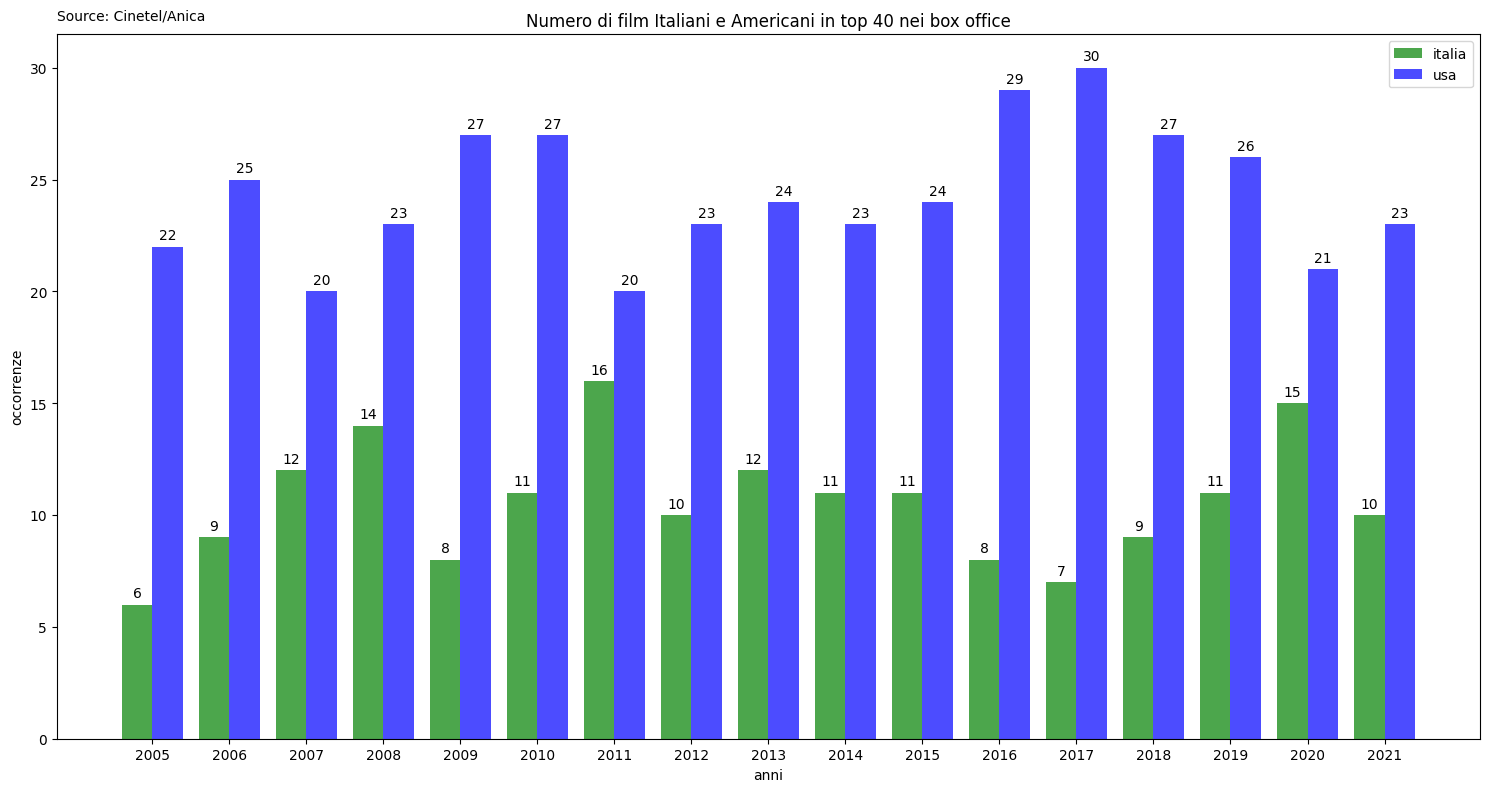

In [122]:
# Film italiani e americani in TOP40

top10s = get_topX(40)
itas = get_naz_top(top10s, 'ITA')
usas = get_naz_top(top10s, 'USA')

labels = np.arange(2005, 2022)
x = np.arange(len(itas))

fig, ax = plt.subplots(figsize=(15,8))

width = 0.4

rects1 = ax.bar(x - width/2, itas, width=width, color='green', label='italia', alpha=.7)
rects2 = ax.bar(x + width/2, usas, width=width, color='blue', label='usa', alpha=.7)

ax.set_ylabel('occorrenze')
ax.set_xlabel('anni')
ax.set_title('Numero di film Italiani e Americani in top 40 nei box office')
ax.set_xticks(x, labels)
plt.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Ita_Usa_occ_top40_groupbarchart.png', bbox_inches='tight')

plt.show()

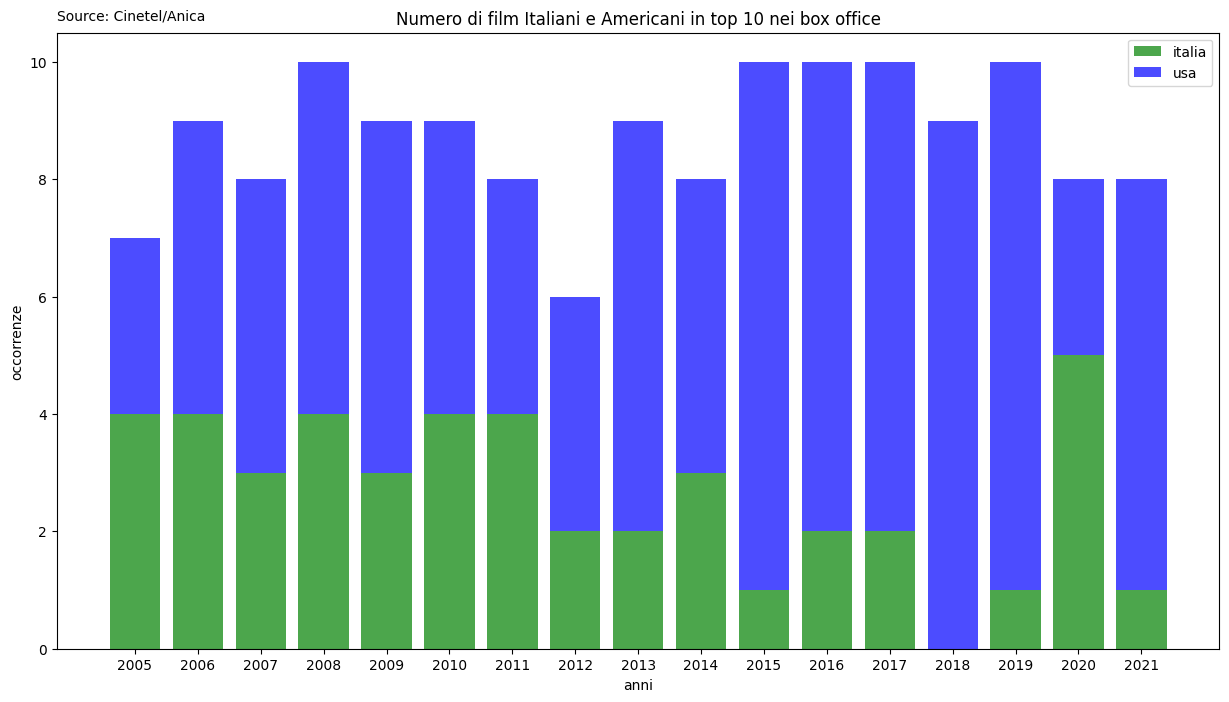

In [123]:
lst = []
for year in range(2005, 2022):
    for i in range(0, 10):
            lst.append(box_offices[box_offices['Year'] == year].iloc[i])
top10s = pd.DataFrame(lst)

countbynaz = top10s.groupby(['Year', 'Naz.']).size().to_frame(name='count').reset_index()
x = countbynaz['Year'].unique()
itas = countbynaz[countbynaz['Naz.'] == 'ITA']
itas = pd.concat([itas, pd.DataFrame.from_records([{'Year':2018, 'Naz.':'ITA', 'count':0}])])
itas = itas.sort_values(by=['Year'])['count']
usas = countbynaz[countbynaz['Naz.'] == 'USA']['count']

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x, itas, color='green', label='italia', alpha=.7)
ax.bar(x, usas, color='blue', bottom=itas, label='usa', alpha=.7)

plt.xticks(range(2005, 2022))
plt.ylabel('occorrenze')
plt.xlabel('anni')
plt.title('Numero di film Italiani e Americani in top 10 nei box office')
plt.legend()

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Ita_Usa_occ_top10.png', bbox_inches='tight')

plt.show()

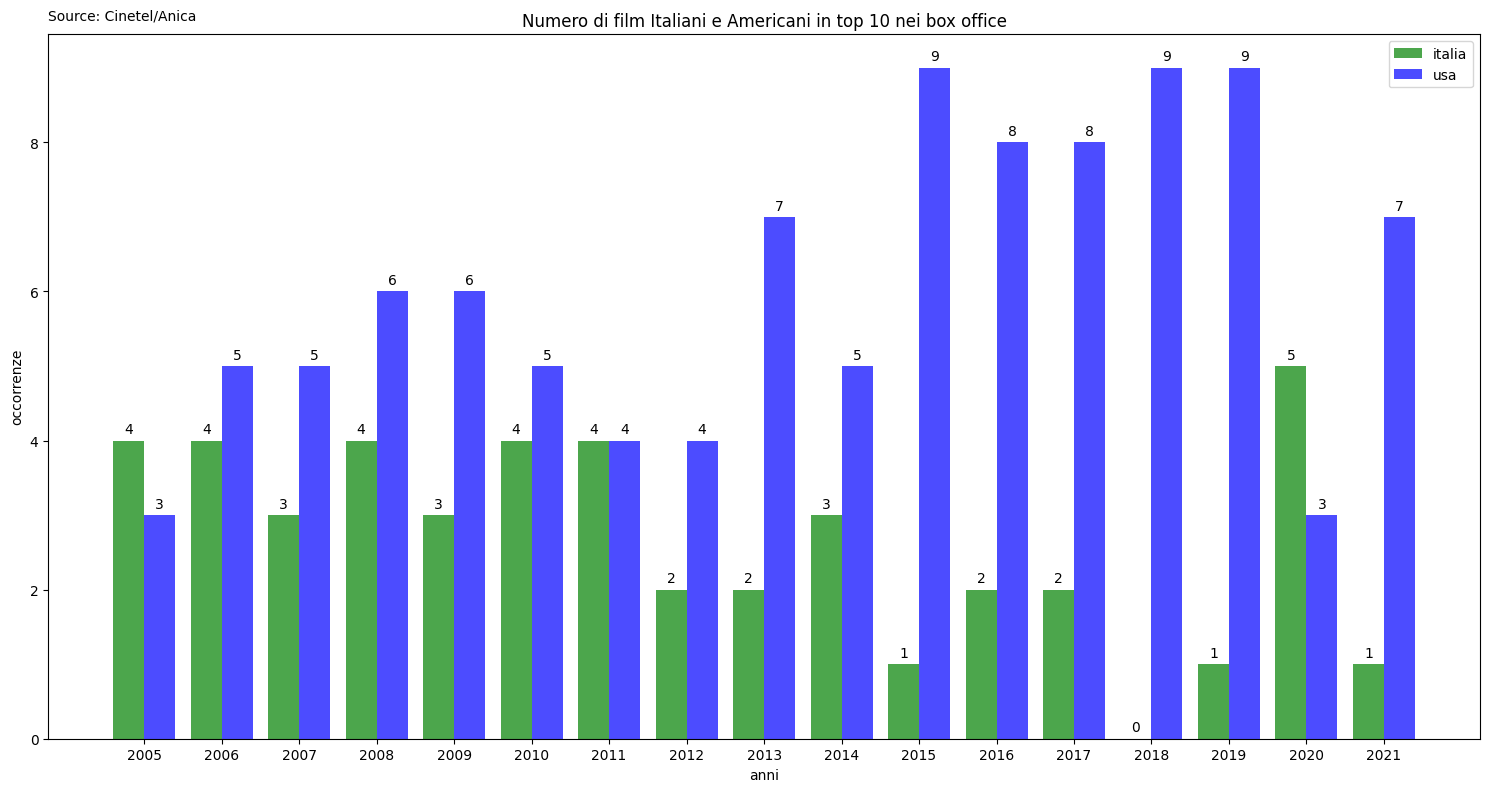

In [124]:
# Film italiani e americani in TOP10

top10s = get_topX(10)
itas = get_naz_top(top10s, 'ITA')
usas = get_naz_top(top10s, 'USA')

labels = np.arange(2005, 2022)
x = np.arange(len(itas))

fig, ax = plt.subplots(figsize=(15,8))

width = 0.4

rects1 = ax.bar(x - width/2, itas, width=width, color='green', label='italia', alpha=.7)
rects2 = ax.bar(x + width/2, usas, width=width, color='blue', label='usa', alpha=.7)

ax.set_ylabel('occorrenze')
ax.set_xlabel('anni')
ax.set_title('Numero di film Italiani e Americani in top 10 nei box office')
ax.set_xticks(x, labels)
plt.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Ita_Usa_occ_top10_groupbarchart.png', bbox_inches='tight')

plt.show()

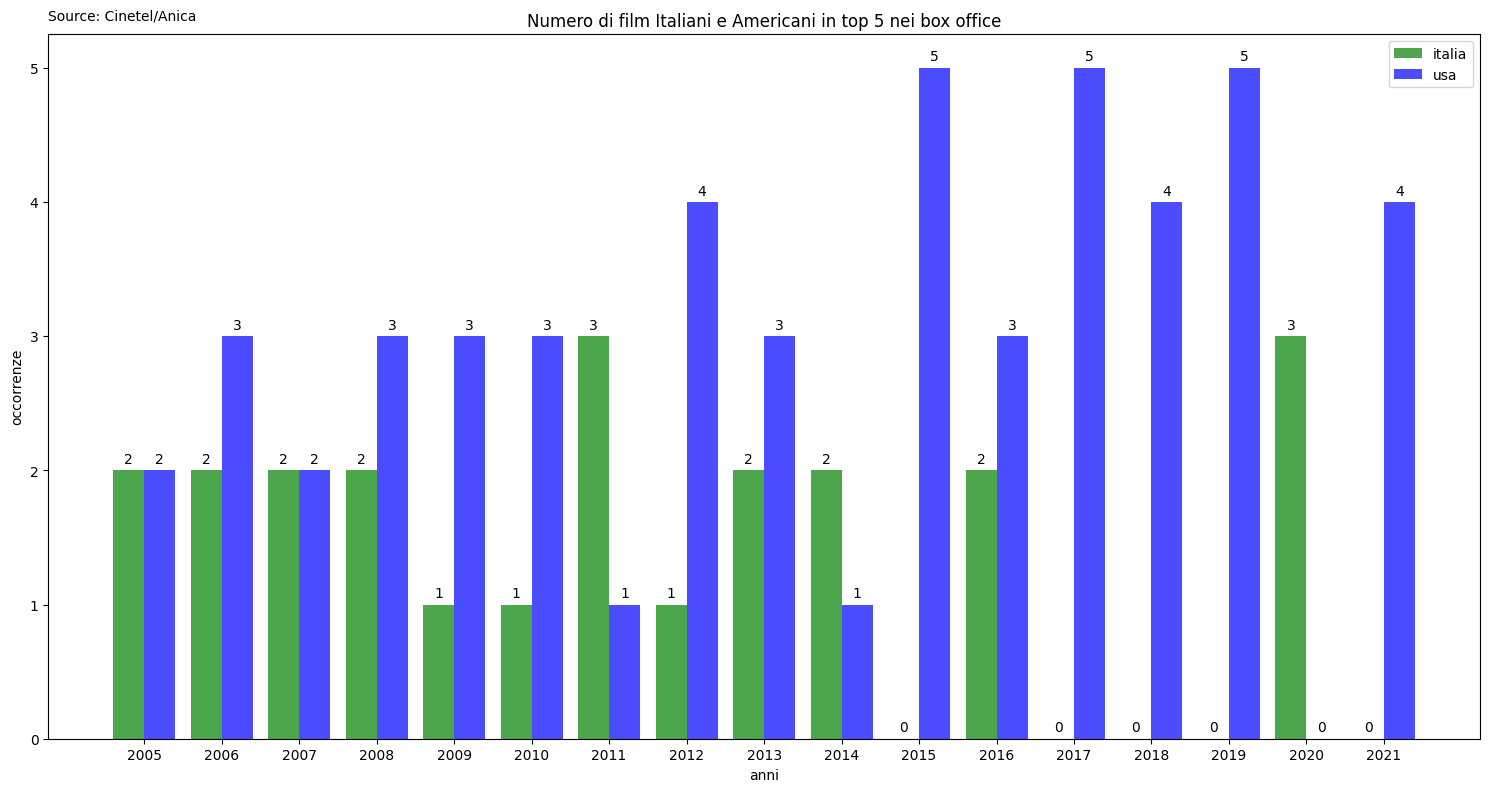

In [125]:
# Film italiani e americani in TOP5

top5s = get_topX(5)
itas = get_naz_top(top5s, 'ITA')
usas = get_naz_top(top5s, 'USA')

labels = np.arange(2005, 2022)
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(15,8))

width = 0.4

rects1 = ax.bar(x - width/2, itas, width=width, color='green', label='italia', alpha=.7)
rects2 = ax.bar(x + width/2, usas, width=width, color='blue', label='usa', alpha=.7)

ax.set_ylabel('occorrenze')
ax.set_xlabel('anni')
ax.set_title('Numero di film Italiani e Americani in top 5 nei box office')
ax.set_xticks(x, labels)
plt.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Ita_Usa_occ_top5_groupbarchart.png', bbox_inches='tight')

plt.show()

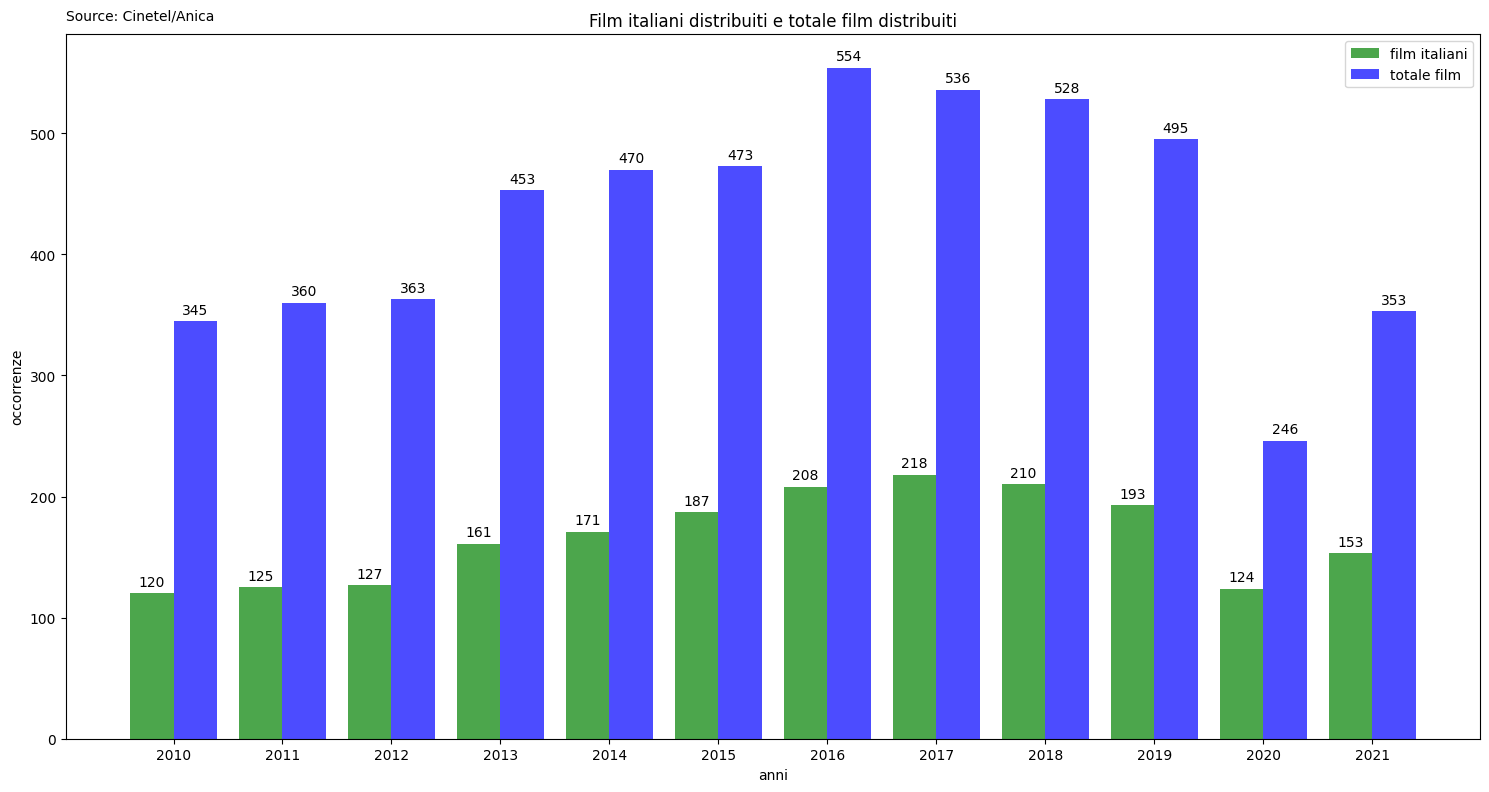

In [126]:
# MA QUANTI NUOVI FILM ITALIANI E NON VENGONO DISTRIBUITI?
# da 2004 a 2009 i dati sono stati predetti con LinearRegression
num_film = pd.read_csv('Dati_Cinema_Italiani/tables/numero_film.csv', sep=',', decimal='.', thousands='.')
num_ita = num_film[num_film['Year'] >= 2010]['Film Italiani co-prodotti']
num_tot = num_film[num_film['Year'] >= 2010]['Totale Film']

labels = np.arange(2010, 2022)
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(15,8))

width = 0.4

rects1 = ax.bar(x - width/2, num_ita, width=width, color='green', label='film italiani', alpha=.7)
rects2 = ax.bar(x + width/2, num_tot, width=width, color='blue', label='totale film', alpha=.7)

ax.set_ylabel('occorrenze')
ax.set_xlabel('anni')
ax.set_title('Film italiani distribuiti e totale film distribuiti')
ax.set_xticks(x, labels)
plt.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/num_film_ita_tot.png', bbox_inches='tight')

plt.show()


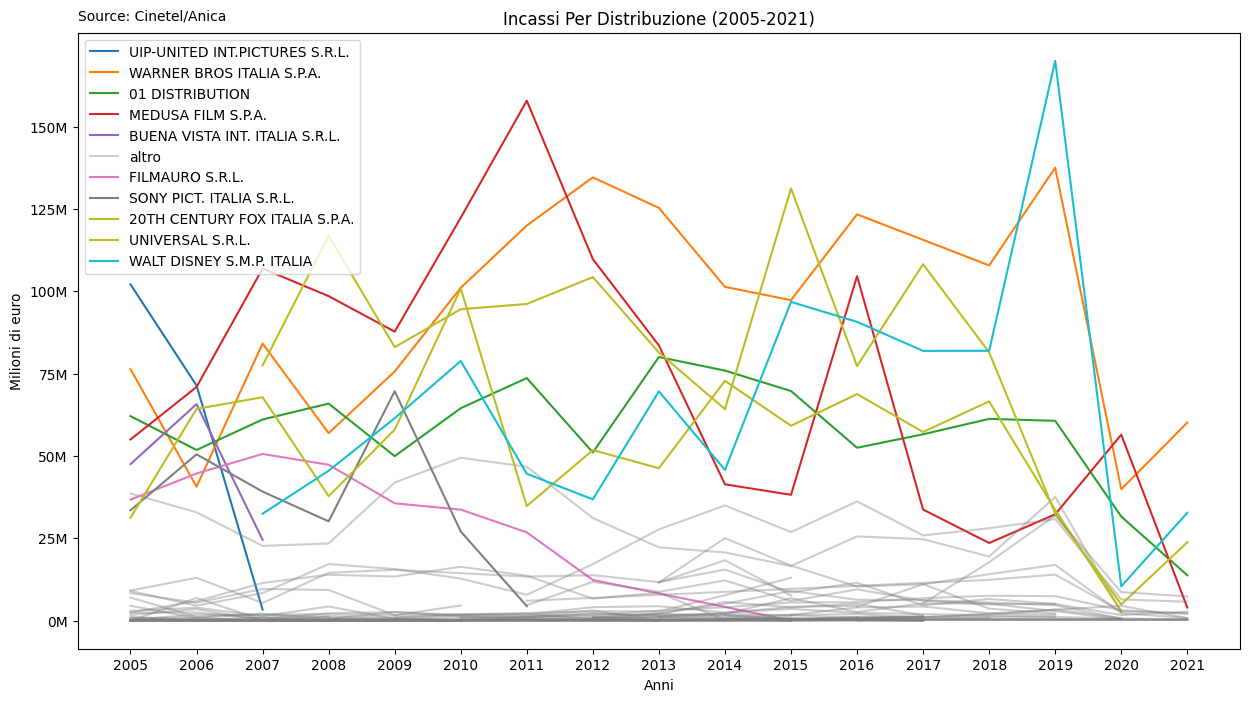

In [127]:
# INCASSI PER DISTRIBUZIONE 2005-2021
# INCASSI FILM IN ITALIA PER NAZIONE (senza filtri)

# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8))
handles = []

distribuzioni = distr['Distribuzione'].unique()

count = 1
for d in distribuzioni:
    tmp = distr[distr['Distribuzione'] == str(d)][['Year', 'Incasso']]
    if tmp['Incasso'].max() > 50000000:
        line, = ax.plot(tmp['Year'], tmp['Incasso'], label=d)
        handles.append(line)
    else:
        line, = ax.plot(tmp['Year'], tmp['Incasso'], label='altro', alpha=.4)
        if count == 1: # mi serve per non aggiungere duplicati nella legenda
            handles.append(line)
            count = 0
        line.set_color('grey')

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Incassi Per Distribuzione (2005-2021)')

ax.legend(handles = handles)

# custom x_ticks for Million
plt.yticks(np.arange(0, distr['Incasso'].max(), step=25000000))
plt.xticks(np.arange(2005, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Incassi_Distribuzioni_nofilter.png', bbox_inches='tight')

plt.show()

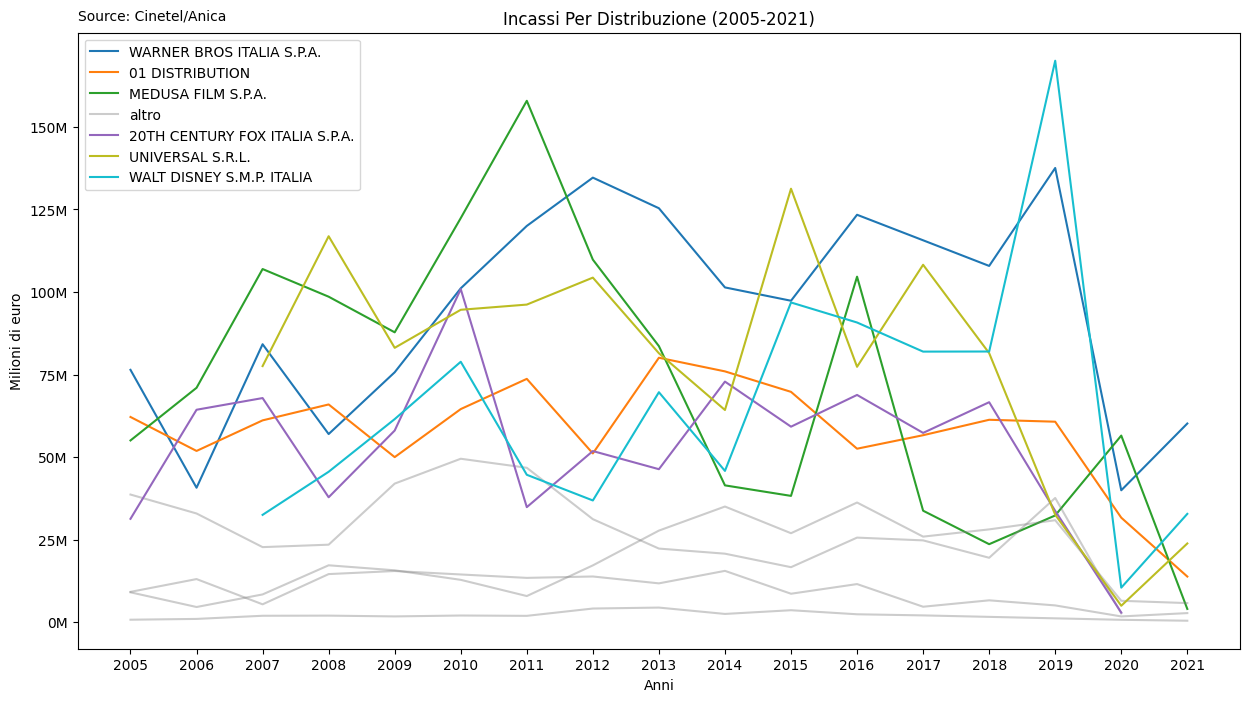

In [128]:
# INCASSI PER DISTRIBUZIONE 2005-2021
# INCASSI FILM IN ITALIA PER NAZIONE (almeno 14 occorrenze)

# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8))
handles = []

distribuzioni = distr['Distribuzione'].unique()

count = 1
for d in distribuzioni:
    tmp = distr[distr['Distribuzione'] == str(d)][['Year', 'Incasso']]
    if (len(tmp) < 14):
        continue
    if tmp['Incasso'].max() > 50000000:
        line, = ax.plot(tmp['Year'], tmp['Incasso'], label=d)
        handles.append(line)
    else:
        line, = ax.plot(tmp['Year'], tmp['Incasso'], label='altro', alpha=.4)
        if count == 1: # mi serve per non aggiungere duplicati nella legenda
            handles.append(line)
            count = 0
        line.set_color('grey')

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Incassi Per Distribuzione (2005-2021)')

ax.legend(handles = handles)

# custom x_ticks for Million
plt.yticks(np.arange(0, distr['Incasso'].max(), step=25000000))
plt.xticks(np.arange(2005, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Incassi_Distribuzioni_filter1.png', bbox_inches='tight')

plt.show()

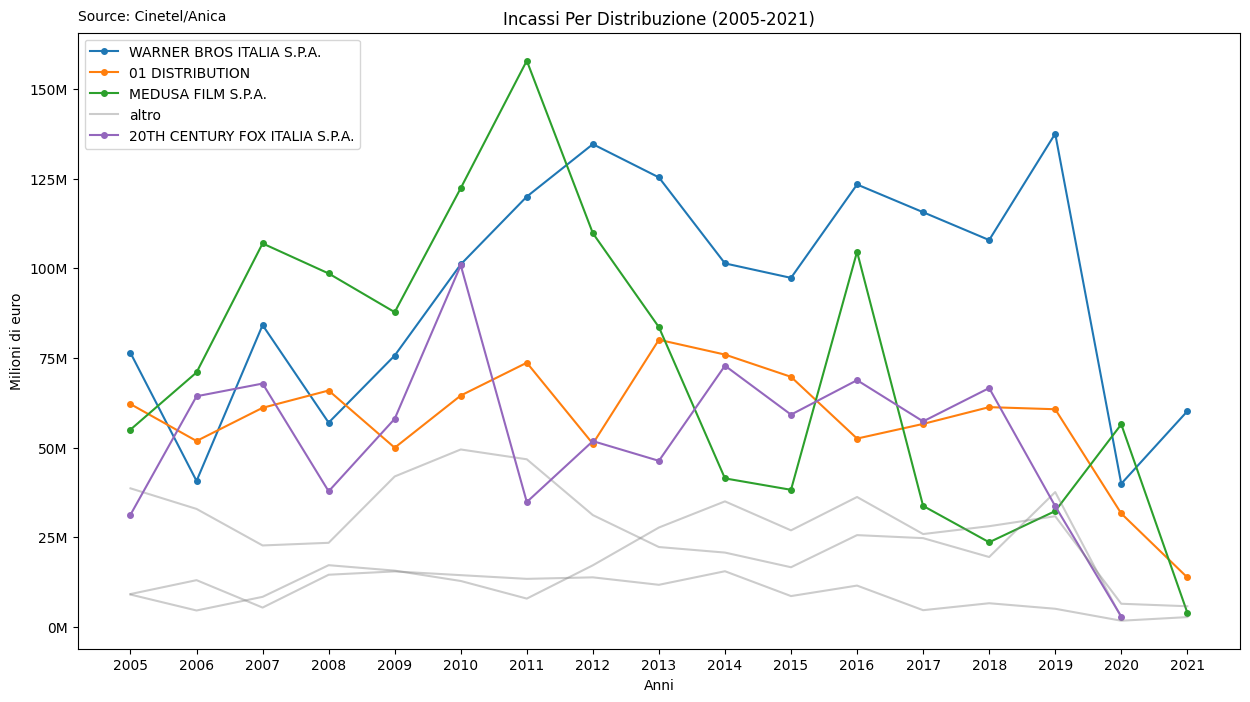

In [129]:
# INCASSI PER DISTRIBUZIONE 2005-2021
# INCASSI FILM IN ITALIA PER NAZIONE (distribuzioni con al più un'assenza)

# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8))
handles = []

distribuzioni = distr['Distribuzione'].unique()

count = 1
for d in distribuzioni:
    tmp = distr[distr['Distribuzione'] == str(d)][['Year', 'Incasso']]
    if (len(tmp) < 16):
        continue
    if tmp['Incasso'].max() > 50000000:
        line, = ax.plot(tmp['Year'], tmp['Incasso'], label=d, marker='o', markersize=4)
        handles.append(line)
    else:
        line, = ax.plot(tmp['Year'], tmp['Incasso'], label='altro', alpha=.4)
        if count == 1: # mi serve per non aggiungere duplicati nella legenda
            handles.append(line)
            count = 0
        line.set_color('grey')

plt.xlabel('Anni')
plt.ylabel('Milioni di euro')
plt.title('Incassi Per Distribuzione (2005-2021)')

ax.legend(handles = handles)

# custom x_ticks for Million
plt.yticks(np.arange(0, distr['Incasso'].max(), step=25000000))
plt.xticks(np.arange(2005, 2022, step=1))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*0.000_001) for x in current_values])

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Incassi_Distribuzioni_filter2.png', bbox_inches='tight')

plt.show()

In [130]:
occ_all = occ_genres(all=True)
df = pd.DataFrame(occ_all.items(), columns=['Genre', 'Count'])

fig = px.treemap(
    df,
    path=['Genre'],
    values='Count',
    color='Count',
    # color_continuous_scale=px.colors.sequential.Viridis,
    color_continuous_midpoint=np.average(df['Count']),
    title='Occorrenze generi di tutti i Film (solo top 40)'
)
fig.update_traces(root_color="white", hovertemplate='%{label}<br>%{value}', hoverinfo=None)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].texttemplate = '%{label}<br>%{value}'

# credit source data
fig.add_annotation(
    text = ("Credit: TMDB API"),
    showarrow=False,
    x = 0,
    y = 0,
    xref='paper',
    yref='paper',
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-20,
    align="left"
)

fig.write_image('Dati_Cinema_Italiani/plots/all_genre_treemap.png', width=1233, height=701)

fig.show()

In [131]:
occ_ita = occ_genres(ita=True)
df = pd.DataFrame(occ_ita.items(), columns=['Genre', 'Count'])
df = df[df['Count']!=0]

fig = px.treemap(
    df,
    path=['Genre'],
    values='Count',
    color='Count',
    # color_continuous_scale=px.colors.sequential.Viridis,
    color_continuous_midpoint=np.average(df['Count']),
    title='Occorrenze generi di Film italiani (solo top 40)'
)
fig.update_traces(root_color="white", hovertemplate='%{label}<br>%{value}', hoverinfo=None)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].texttemplate = '%{label}<br>%{value}'

# credit source data
fig.add_annotation(
    text = ("Credit: TMDB API"),
    showarrow=False,
    x = 0,
    y = 0,
    xref='paper',
    yref='paper',
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-20,
    align="left"
)

fig.write_image('Dati_Cinema_Italiani/plots/ita_genre_treemap.png', width=1233, height=701)

fig.show()

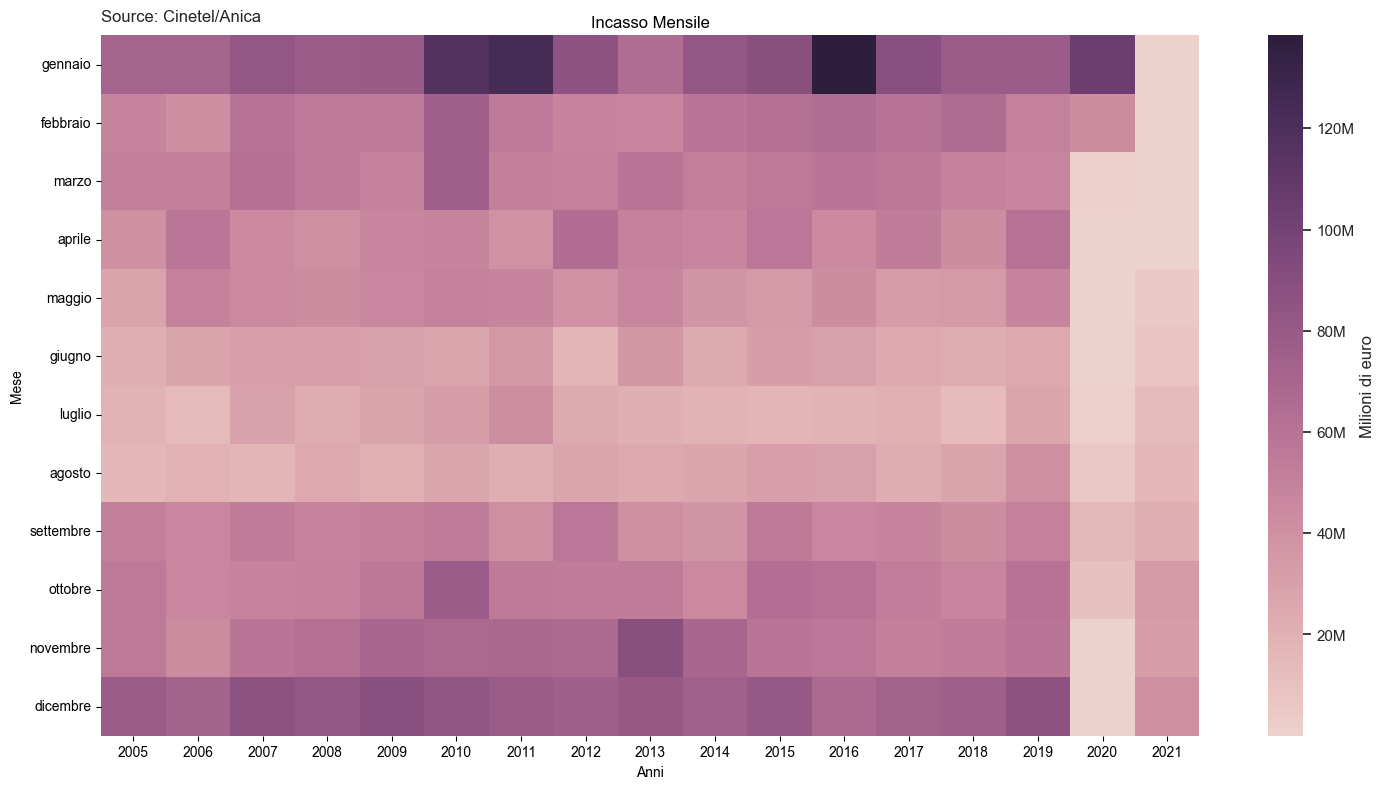

In [132]:
df = mesi.replace({'Incasso': 0}, 1)
months = df['Mese']
years = df['Year']
income = df['Incasso']

heatmap = pd.pivot_table(df, values ='Incasso', index=['Mese'], columns='Year', sort=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.set()
sns.heatmap(heatmap, cmap=sns.cubehelix_palette(as_cmap=True), cbar_kws={'label': 'Milioni di euro'})

# custom colourbar
cbar = fig.get_figure().get_axes()[1]
yticks = np.arange(0, 160000000, step=20000000)
ticks_loc = cbar.get_yticks().tolist()
cbar.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
cbar.set_yticklabels(['{:1.0f}M'.format(ytick*0.000_001) for ytick in yticks])

ax.set_title("Incasso Mensile")
ax.set_xlabel('Anni')
fig.tight_layout()

# credit source data
plt.annotate('Source: Cinetel/Anica', xy=(0,1.02), xycoords='axes fraction')

plt.savefig('Dati_Cinema_Italiani/plots/Incassi_mensili_heatmap.png', bbox_inches='tight')

plt.show()